In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import pandas as pd
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import optim


In [ ]:
#device config
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
train_data = datasets.MNIST(
    root='./data',
    train=True,
    transform=ToTensor(),
    download=True,
)

test_data = datasets.MNIST(
    root='./data',
    train=False,
    transform=ToTensor()
)


100%|██████████| 9912422/9912422 [00:00<00:00, 351042438.84it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 13812507.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 135539272.84it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4966248.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# print the data of both train test data to make sure it works
print(f'{train_data}\n\n{test_data}')


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


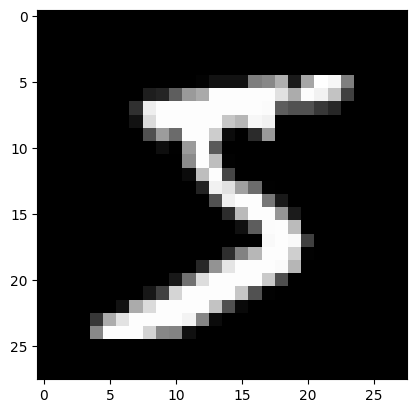

In [ ]:
# showing one of the images from the dataset
plt.imshow(train_data.data[0], cmap='gray')
plt.show()

In [ ]:
# Using data loader to properly load data into model
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 64)

In [ ]:
from torch.nn.modules.pooling import MaxPool2d

# make the model itself
model = torch.nn.Sequential(
    torch.nn.Conv2d(1,20,5),
    torch.nn.ReLU(),
    torch.nn.AdaptiveMaxPool2d((7,7)),
    torch.nn.Conv2d(20,64,5),
    torch.nn.ReLU(),
    torch.nn.AdaptiveMaxPool2d((7,7)),
    torch.nn.Flatten(),
    torch.nn.Linear(64*7*7,10)
)



In [ ]:
# print out model architecture
print(model)

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): AdaptiveMaxPool2d(output_size=(7, 7))
  (3): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AdaptiveMaxPool2d(output_size=(7, 7))
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [ ]:
# sending model to the device selected above

model.to(device)

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): AdaptiveMaxPool2d(output_size=(7, 7))
  (3): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AdaptiveMaxPool2d(output_size=(7, 7))
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)

In [ ]:
# loss function to find what your loss is
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
from torch import optim

# add your optimizer
optimizer = optim.Adam(model.parameters())

In [ ]:
# add number of epochs here
num_epochs = 5

In [ ]:
# this trains your model

print("We are training the model!")
for epoch in range(num_epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # get the prediction
    pred = model(inputs)
    # get a loss from guessing
    loss = loss_func(pred,labels)

    # backpropgation
    loss.backward()
    # let the optimizer step forward
    optimizer.step()
    # add loss of image to next one
    running_loss += loss.item()

    if i % 100 == 99:    # print every 100 batches
      print('Epoch %d, Batch %d, Loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 100))
      running_loss = 0.0

  print('Epoch %d completed' % (epoch + 1))
print(" ------------------------------------Training is complete! ------------------------------------")

We are training the model!
Epoch 1, Batch 100, Loss: 0.732
Epoch 1, Batch 200, Loss: 0.201
Epoch 1, Batch 300, Loss: 0.149
Epoch 1, Batch 400, Loss: 0.118
Epoch 1, Batch 500, Loss: 0.096
Epoch 1, Batch 600, Loss: 0.086
Epoch 1, Batch 700, Loss: 0.082
Epoch 1, Batch 800, Loss: 0.075
Epoch 1, Batch 900, Loss: 0.075
Epoch 1 completed
Epoch 2, Batch 100, Loss: 0.059
Epoch 2, Batch 200, Loss: 0.056
Epoch 2, Batch 300, Loss: 0.049
Epoch 2, Batch 400, Loss: 0.055
Epoch 2, Batch 500, Loss: 0.061
Epoch 2, Batch 600, Loss: 0.050
Epoch 2, Batch 700, Loss: 0.053
Epoch 2, Batch 800, Loss: 0.055
Epoch 2, Batch 900, Loss: 0.055
Epoch 2 completed
Epoch 3, Batch 100, Loss: 0.042
Epoch 3, Batch 200, Loss: 0.041
Epoch 3, Batch 300, Loss: 0.039
Epoch 3, Batch 400, Loss: 0.030
Epoch 3, Batch 500, Loss: 0.045
Epoch 3, Batch 600, Loss: 0.039
Epoch 3, Batch 700, Loss: 0.038
Epoch 3, Batch 800, Loss: 0.034
Epoch 3, Batch 900, Loss: 0.045
Epoch 3 completed
Epoch 4, Batch 100, Loss: 0.034
Epoch 4, Batch 200, Los